# Kaggle Project - Spaceship Titanic

**Created:** 15Apr2022
**Author:** Lynn Menchaca

**Resources:**
Kaggle, Data Quest Lectures

The purpose of this file is to clean and and perform initial analysis on the train and test data files provided by Kaggle for the Spaceship Titanic compition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
data_file_path = '/Users/lynnpowell/Documents/DS_Projects/Spaceship_Titanic/'
df_train = pd.read_csv(data_file_path+'train.csv')
df_test = pd.read_csv(data_file_path+'test.csv')

df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
#Test data frame is missing the Transported collumn becuase that is what we will be predicting.
print(df_train.shape)
print(df_test.shape)
df_train.dtypes

(8693, 14)
(4277, 13)


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:
#find all the missing values in each column for both the train and the test
print('Train Data Missing values')
print(df_train.isnull().sum())
print('Test Data Missing values')
print(df_test.isnull().sum())

Train Data Missing values
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Test Data Missing values
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
#Looking at how many rows have multiple missing data columns
print(df_train.isnull().sum(axis=1).value_counts())
print('Total Number of rows with missing data: ' + str(df_train[df_train.isnull().sum(axis=1)>0].isnull().value_counts().sum()))

0    6606
1    1867
2     203
3      17
dtype: int64
Total Number of rows with missing data: 2087


In [6]:
#Pulling group information from the passenger IDs
df_train['ID_Group']=df_train['PassengerId'].str.split('_').str[0]
df_test['ID_Group']=df_test['PassengerId'].str.split('_').str[0]
df_train['ID_Group'].describe()

count     8693
unique    6217
top       4498
freq         8
Name: ID_Group, dtype: object

In [7]:
#Total amount each person spent
#spend_location-> list of location to spend money
spend_locations = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_train['Spend_Sum'] = df_train[spend_locations].sum(axis=1)
df_test['Spend_Sum'] = df_train[spend_locations].sum(axis=1)
print(df_train['Spend_Sum'].isnull().sum())
df_train['Spend_Sum'].describe()

0


count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: Spend_Sum, dtype: float64

In [8]:
#Looking at passengers that were awake only
df_awake = df_train[df_train['CryoSleep']==False]
df_awake[df_awake['Spend_Sum']==0].head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID_Group,Spend_Sum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,0.0
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,0017,0.0
24,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True,0020,0.0
26,0020_06,Earth,False,E/0/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,False,0020,0.0
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True,0031,0.0
52,0056_01,Europa,False,A/1/S,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Okulas Tractive,True,0056,0.0
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,0082,0.0
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True,0108,0.0
134,0146_01,Earth,False,G/25/S,TRAPPIST-1e,56.0,False,0.0,0.0,0.0,0.0,0.0,Verly Wolferguson,False,0146,0.0
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False,0179,0.0


In [9]:
#Did Cryo Sleepers have an awake group member?

#creating a new data frame with two columns
#the count of each ID_group and the count of passengers in Cryo Sleep
df_new = df_train.groupby('ID_Group').agg(
    Fam_Count = ('ID_Group','count'),
    Cryo_Count = ('CryoSleep', lambda x: str(x).count('True')))

#Finding the number of family members awake in each group
df_new['Awake_In_Fam'] = df_new['Fam_Count'] - df_new['Cryo_Count']
df_new.head(10)

#data frame of cryo sleep groups with no family members awake
all_cryo = df_new[(df_new['Cryo_Count']!=0)&(df_new['Awake_In_Fam']==0)]
print(all_cryo.head(7))

#To training data add column with 1/0 (True/False):
#True = All of Group in Cryo Sleep, False = at least one group member is awake
cryo_fam_list = all_cryo.index.tolist()
#print(cryo_fam)
df_train['Cryo_Fam'] = df_train['ID_Group'].apply(lambda x: 1 if x in cryo_fam_list else 0)
df_train[['PassengerId','Cryo_Fam']].iloc[35:45]

          Fam_Count  Cryo_Count  Awake_In_Fam
ID_Group                                     
0016              1           1             0
0024              1           1             0
0034              1           1             0
0039              1           1             0
0041              1           1             0
0044              3           3             0
0058              1           1             0


,PassengerId,Cryo_Fam
35,0031_03,0
36,0034_01,1
37,0035_01,0
38,0036_01,0
39,0038_01,0
40,0039_01,1
41,0041_01,1
42,0043_01,0
43,0044_01,1
44,0044_02,1


In [10]:
#Looking at just the passengers in Cryo Sleep
cryo_df = df_train[df_train['CryoSleep'] == True]
cryo_fam = cryo_df[cryo_df['Cryo_Fam']==1]
#families all cryo / total number of families with at least one member in cryo sleep
cryo_fam_percent = len(cryo_fam.groupby('ID_Group')) / len(cryo_df.groupby('ID_Group'))
print(len(cryo_df.groupby('ID_Group')))
print('Percentage of full groups in Cryo Sleep:')
print(cryo_fam_percent)

2483
Percentage of full groups in Cryo Sleep:
0.6612968183648812


Based off the data above some families had everyone in Cryo Sleep. Counting all the goups with at least one member in Cryo Sleep, 66.13% of those groups have everyone in Cryo Sleep. 

In [11]:
#Cryo Families for the test data
#creating a new data frame with two columns
#the count of each ID_group and the count of passengers in Cryo Sleep
df_new = df_test.groupby('ID_Group').agg(
    Fam_Count = ('ID_Group','count'),
    Cryo_Count = ('CryoSleep', lambda x: str(x).count('True')))

#Finding the number of family members awake in each group
df_new['Awake_In_Fam'] = df_new['Fam_Count'] - df_new['Cryo_Count']
df_new.head(10)

#data frame of cryo sleep groups with no family members awake
all_cryo = df_new[(df_new['Cryo_Count']!=0)&(df_new['Awake_In_Fam']==0)]
print(all_cryo.head(7))

#To training data add column with 1/0 (True/False):
#True = All of Group in Cryo Sleep, False = at least one group member is awake
cryo_fam_list = all_cryo.index.tolist()
#print(cryo_fam)
df_test['Cryo_Fam'] = df_test['ID_Group'].apply(lambda x: 1 if x in cryo_fam_list else 0)

          Fam_Count  Cryo_Count  Awake_In_Fam
ID_Group                                     
0013              1           1             0
0019              1           1             0
0029              1           1             0
0032              2           2             0
0042              1           1             0
0059              1           1             0
0063              1           1             0


In [12]:
#Checking the assumption if the passenger is in suspended animation they don't spend money
df_cryo = df_train[df_train['CryoSleep']==True]
df_cryo[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

Since spending sum is $0.0 for each location, assuming if the passenger is in cryo sleep they do not spend any money.

In [13]:
#Using the Spend_Sum to set the CryoSleep as False if money was spent

df_train.loc[((df_train['CryoSleep'].isna()) & (df_train['Spend_Sum']!=0)),'CryoSleep'] = False
df_test.loc[((df_test['CryoSleep'].isna()) & (df_test['Spend_Sum']!=0)),'CryoSleep'] = False

In [14]:
#find all the missing values in each column
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep        98
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
ID_Group          0
Spend_Sum         0
Cryo_Fam          0
dtype: int64

In [15]:
#Looking at how many rows have multiple missing data columns
print(df_train.isnull().sum(axis=1).value_counts())
print('Total Number of rows with missing data: ' + str(df_train[df_train.isnull().sum(axis=1)>0].isnull().value_counts().sum()))

0    6698
1    1799
2     182
3      14
dtype: int64
Total Number of rows with missing data: 1995


The next cell uses the assumption passengers traveling together are from the same homeplanet, are staying on the same floor and are departing together. If given more time on this project I would perform and analysis to prove this assumption is correct by analyzing each group of passengers and those 3 features.

In [16]:
#Training Data
#Making the assumption if the passengers are in the same family then they have the same:
#Homeplanet, Cabin, Destination and VIP status
fill_features = ['HomePlanet', 'Cabin', 'Destination', 'VIP']

#going cleaning each feature independently
for feat in fill_features:
    #list of all index rows with null values for single feature
    null_index = df_train.index[df_train[feat].isnull()].tolist()
    
    for df_index in null_index:
        #Finding the group each index row belongs to
        id_group = df_train['ID_Group'].iloc[df_index]
        
        #Checking if they are a solo traveling passengers
        if len(df_train[df_train['ID_Group']==id_group])>1:
            group_index = df_train.index[df_train['ID_Group']==id_group].tolist()
            group_index.remove(df_index)
            i = 0
            #Use while loop to go though each group member
            while i < len(group_index):
                if group_index[i] in null_index:
                    i += 1
                else:
                    break
            #making sure the value of i can fit in the group_index array
            if i == len(group_index):
                i -= 1
            #Filling in the null values with first listed member in group data for single feature
            #df_train.loc[df_index, 'HomePlanet'] = df_train['HomePlanet'].iloc[[group_index[i]]]
            df_train[feat].iloc[[df_index]] = df_train[feat].iloc[[group_index[i]]]

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_4146/3706570320.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[feat].iloc[[df_index]] = df_train[feat].iloc[[group_index[i]]]


In [17]:
#Test Data
#Making the assumption if the passengers are in the same family then they have the same:
#Homeplanet, Cabin, Destination and VIP status
fill_features = ['HomePlanet', 'Cabin', 'Destination', 'VIP']

#going cleaning each feature independently
for feat in fill_features:
    #list of all index rows with null values for single feature
    null_index = df_test.index[df_test[feat].isnull()].tolist()
    
    for df_index in null_index:
        #Finding the group each index row belongs to
        id_group = df_test['ID_Group'].iloc[df_index]
        
        #Checking if they are a solo traveling passengers
        if len(df_test[df_test['ID_Group']==id_group])>1:
            group_index = df_test.index[df_test['ID_Group']==id_group].tolist()
            group_index.remove(df_index)
            i = 0
            #Use while loop to go though each group member
            while i < len(group_index):
                if group_index[i] in null_index:
                    i += 1
                else:
                    break
            #making sure the value of i can fit in the group_index array
            if i == len(group_index):
                i -= 1
            
            #Filling in the null values with last listed member in group data for single feature
            df_test[feat].iloc[[df_index]] = df_test[feat].iloc[[group_index[i]]]

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_4146/3436752892.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[feat].iloc[[df_index]] = df_test[feat].iloc[[group_index[i]]]


In [18]:
#Looking at data that is still NA
df_train[df_train['Cabin'].isna()].head(10)
#It looks like most of the data still not filled in is from passengers traveling alone

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID_Group,Spend_Sum,Cryo_Fam
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,0012,908.0,0
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,0101,0.0,1
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,0239,1048.0,0
272,0301_01,Earth,True,NaN,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Margia Wriggins,False,0301,0.0,1
280,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,False,0310,4947.0,0
295,0327_01,Earth,False,NaN,TRAPPIST-1e,19.0,False,17.0,0.0,784.0,0.0,2.0,Jasony Ocherman,True,0327,803.0,0
317,0355_01,Earth,True,NaN,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Tricky Warrison,True,0355,0.0,1
344,0380_01,Europa,True,NaN,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,Zinopus Fuelddid,True,0380,0.0,1
436,0468_01,Earth,True,NaN,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Haryn Wynneyerson,False,0468,0.0,1
462,0502_01,Mars,False,NaN,TRAPPIST-1e,22.0,False,10.0,0.0,817.0,471.0,0.0,Pigars Swell,False,0502,1298.0,0


In [19]:
#Fill the null spending values for the passengers in Cryo Sleep with 0
spend = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for x in spend:
    df_train.loc[((df_train[x].isna()) & (df_train['CryoSleep']==True)),x] = 0
    df_test.loc[((df_test[x].isna()) & (df_test['CryoSleep']==True)),x] = 0

df_cryo = df_train[df_train['CryoSleep']==True]
df_cryo[spend].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [20]:
#sum of missing values in each column
print('Train Data Missing values')
print(df_train.isnull().sum())
print('Test Data Missing values')
print(df_test.isnull().sum())

Train Data Missing values
PassengerId       0
HomePlanet      111
CryoSleep        98
Cabin            99
Destination     103
Age             179
VIP             116
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
ID_Group          0
Spend_Sum         0
Cryo_Fam          0
dtype: int64
Test Data Missing values
PassengerId      0
HomePlanet      46
CryoSleep       45
Cabin           63
Destination     51
Age             91
VIP             56
RoomService     57
FoodCourt       67
ShoppingMall    63
Spa             59
VRDeck          51
Name            94
ID_Group         0
Spend_Sum        0
Cryo_Fam         0
dtype: int64


In [21]:
#How many rows have missing data
print(df_train.isnull().sum(axis=1).value_counts())
print('Total Number of rows with missing data: ' + str(df_train[df_train.isnull().sum(axis=1)>0].isnull().value_counts().sum()))

0    7316
1    1271
2     101
3       5
dtype: int64
Total Number of rows with missing data: 1377


In [22]:
#Looking for more patters with Cryo Sleep
df_cryo.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,ID_Group,Spend_Sum,Cryo_Fam
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,0006,0.0,0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,0.0,0
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Altardr Flatic,True,0008,0.0,0
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,0016,0.0,1
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,0020,0.0,0
22,0020_02,Earth,True,E/0/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False,0020,0.0,0
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,Mollen Mcfaddennon,False,0020,0.0,0
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,0.0,0.0,0.0,0.0,0.0,Mael Brantuarez,False,0020,0.0,0
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,0.0,0.0,0.0,Penton Fullided,True,0024,0.0,1
36,0034_01,Europa,True,D/1/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Ziba Oingwhedly,True,0034,0.0,1


In [23]:
print(df_train.shape)
print(df_train['CryoSleep'].isnull().sum())
train_rows = df_train.shape[0]

(8693, 17)
98


In [24]:
#Based of initial analysis the CryoSleep data has a high correlation the the transported data. 
#Drop rows with missing cryo sleep data from the training data
#Dropped because the remaining rows have spend 0 or missing spend data because the passenger could be awake
#and not want spend sum $0 to have inaccurate information based off cryo sleep

#df_train = df_train.dropna(subset=['CryoSleep'])

#print(df_train.shape)
#print(df_train['CryoSleep'].isnull().sum())
#drop_rows = train_rows - df_train.shape[0]
#print('Number of dropped CryoSleep rows: ' + str(drop_rows))

In [25]:
#Looking for titles, prefixes or suffixes in the name column
df_train['Name_len']=df_train['Name'].str.split().str.len()
df_train['Name_len'].value_counts()

2.0    8493
Name: Name_len, dtype: int64

In [26]:
#Removing Name column since it is similar to the PassengerID column, since it does not include name title or prefixes
#Removing Name column because it has missing data
#Removing Name column becuase it does not include name title, prefixes or suffixes
df_train = df_train.drop(['Name','Name_len'],axis=1)
df_test = df_test.drop('Name',axis=1)

df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Spend_Sum', 'Cryo_Fam'],
      dtype='object')

In [27]:
#How many rows have missing data
print(df_train.isnull().sum(axis=1).value_counts())
print('Total Number of rows with missing data: ' + str(df_train[df_train.isnull().sum(axis=1)>0].isnull().value_counts().sum()))

0    7489
1    1125
2      74
3       5
dtype: int64
Total Number of rows with missing data: 1204


Percentage of Passengers Transported:
True     0.503624
False    0.496376
Name: Transported, dtype: float64


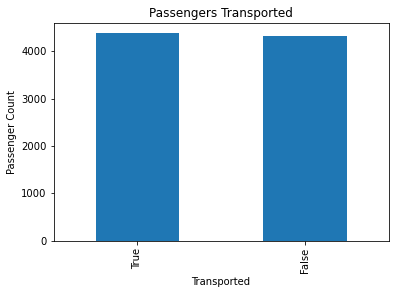

In [28]:
#General Look at Transported vs Stayed
trans_percent = df_train.Transported.value_counts() / len(df_train)
print('Percentage of Passengers Transported:')
print(trans_percent)

df_train.Transported.value_counts().plot(kind='bar')
plt.ylabel('Passenger Count')
plt.xlabel('Transported')
plt.title('Passengers Transported')
plt.show()
#No significant imbalance

In [29]:
#Description and Visual of Ages Transported
print(df_train['Age'].describe())
print('\n')
df_train[df_train['Age']<1].head()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64




,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID_Group,Spend_Sum,Cryo_Fam
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,0017,0.0,0
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,True,0067,0.0,0
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,0092,0.0,0
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True,0108,0.0,0
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,False,0179,0.0,0


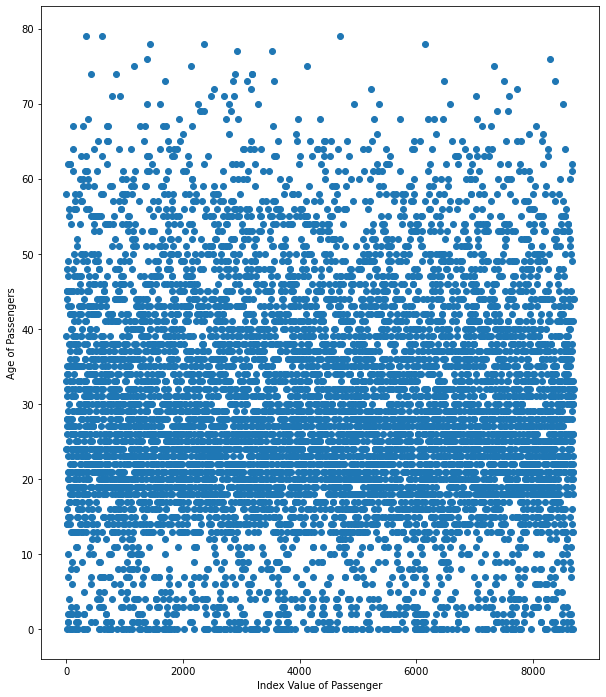

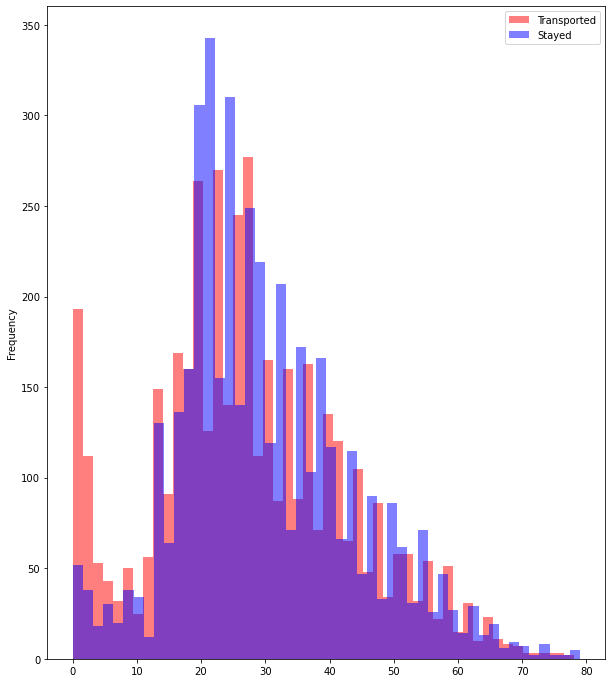

In [30]:
plt.figure(figsize=(10,12))
plt.scatter(list(df_train.index.values), df_train['Age'])
plt.xlabel('Index Value of Passenger')
plt.ylabel('Age of Passengers')
plt.show()

#hist_trans(df_train, 'Age')
plt.figure(figsize=(10,12))
transported = df_train[df_train["Transported"] == True]
stayed = df_train[df_train["Transported"] == False]
transported['Age'].plot.hist(alpha=0.5,color='red',bins=50)
stayed['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Transported','Stayed'])
plt.show()

In [31]:
#Function to put data frame column values in to bins
def process_bins(df,column,cut_points,label_names):
    df[column] = df[column].fillna(-0.5) #filling in any missing data with -0.5
    df[column+'_Categories'] = pd.cut(df[column],cut_points,labels=label_names)
    return df


In [32]:
#Putting ages in to bins
#It looks like babies are just listed as age 0
age_cut_points = [-1, -0.1, 2, 9.9, 17.9, 24.9, 59.9, 100]
age_label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df_train = process_bins(df_train,'Age', age_cut_points, age_label_names)
df_test = process_bins(df_test,'Age', age_cut_points, age_label_names)

df_train.head(7)
#df_train[df_train['Age']<1].head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID_Group,Spend_Sum,Cryo_Fam,Age_Categories
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,0.0,0,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,736.0,0,Young Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,10383.0,0,Adult
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,5176.0,0,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1091.0,0,Teenager
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,0005,774.0,0,Adult
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,0006,1584.0,0,Adult


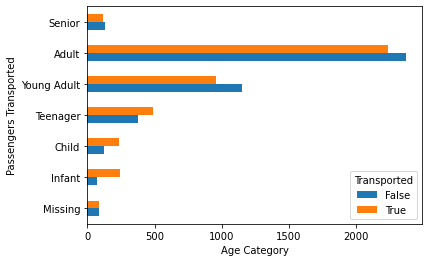

In [33]:
#Ploting Age bins vs Transported

pd.pivot_table(df_train,index = 'Age_Categories', columns = 'Transported',aggfunc ='size').plot.barh()
plt.xlabel('Passengers Transported')
plt.ylabel('Age Categories')
plt.show()

In [34]:
#Analyzing Families
families = df_train.groupby(['ID_Group','Age_Categories']).size().unstack('Age_Categories')
families.head(10)

Age_Categories,Missing,Infant,Child,Teenager,Young Adult,Adult,Senior
ID_Group,,,,,,,
0001,0,0,0,0,0,1,0
0002,0,0,0,0,1,0,0
0003,0,0,0,0,0,2,0
0004,0,0,0,1,0,0,0
0005,0,0,0,0,0,1,0
0006,0,0,0,0,0,2,0
0007,0,0,0,0,0,1,0
0008,0,0,0,1,0,2,0
0009,0,0,0,0,0,1,0


In [35]:
#Total members in a family
df_train['family_sum'] = df_train['Age_Categories'].groupby(df_train['ID_Group']).transform('count')
df_test['family_sum'] = df_test['Age_Categories'].groupby(df_test['ID_Group']).transform('count')


#total number of kids in each family
df_kids = df_train.loc[(df_train['Age_Categories']=='Infant')|(df_train['Age_Categories']=='Child')|(df_train['Age_Categories']=='Teenager'),
                       ['ID_Group','Age_Categories']]
df_train['family_kid_num'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_train['family_kid_num'] = df_train['family_kid_num'].groupby(df_train['ID_Group']).transform('count')

df_kids = df_test.loc[(df_test['Age_Categories']=='Infant')|(df_test['Age_Categories']=='Child')|(df_test['Age_Categories']=='Teenager'),
                       ['ID_Group','Age_Categories']]
df_test['family_kid_num'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_test['family_kid_num'] = df_test['family_kid_num'].groupby(df_test['ID_Group']).transform('count')


#families with infants and children
df_kids = df_train.loc[(df_train['Age_Categories']=='Infant')|(df_train['Age_Categories']=='Child'),
                       ['ID_Group','Age_Categories']]
df_train['family_small_kids'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_train['family_small_kids'] = df_train['family_small_kids'].groupby(df_train['ID_Group']).transform('count')

df_kids = df_test.loc[(df_test['Age_Categories']=='Infant')|(df_test['Age_Categories']=='Child'),
                       ['ID_Group','Age_Categories']]
df_test['family_small_kids'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_test['family_small_kids'] = df_test['family_small_kids'].groupby(df_test['ID_Group']).transform('count')


#families with teens
df_kids = df_train.loc[df_train['Age_Categories']=='Teenager',
                       ['ID_Group','Age_Categories']]
df_train['family_teen'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_train['family_teen'] = df_train['family_teen'].groupby(df_train['ID_Group']).transform('count')

df_kids = df_test.loc[df_test['Age_Categories']=='Teenager',
                       ['ID_Group','Age_Categories']]
df_test['family_teen'] = df_kids['Age_Categories'].groupby(df_kids['ID_Group']).transform('count')
df_test['family_teen'] = df_test['family_teen'].groupby(df_test['ID_Group']).transform('count')


#kids traveling without adults
df_train['kids_without_adults'] = df_train.apply(lambda x: 1 if (x['family_sum'] - x['family_kid_num']) == 0 else 0, axis=1)
df_test['kids_without_adults'] = df_test.apply(lambda x: 1 if (x['family_sum'] - x['family_kid_num']) == 0 else 0, axis=1)

df_train[df_train['family_sum']>1].head(15)
df_test[df_test['family_sum']>1].head(15)
#df_train[df_train['family_sum','family_kid_num']].head(25)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,ID_Group,Spend_Sum,Cryo_Fam,Age_Categories,family_sum,family_kid_num,family_small_kids,family_teen,kids_without_adults
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,...,0.0,0032,0.0,1,Young Adult,2,0,0,0,0
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,...,0.0,0032,1018.0,1,Young Adult,2,0,0,0,0
11,0040_01,Europa,False,D/2/P,TRAPPIST-1e,45.0,False,932.0,74.0,NaN,...,1010.0,0040,8157.0,0,Adult,2,0,0,0,0
12,0040_02,Europa,False,D/2/P,TRAPPIST-1e,44.0,False,0.0,1561.0,0.0,...,224.0,0040,1309.0,0,Adult,2,0,0,0,0
14,0046_01,Earth,False,G/4/P,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,...,92.0,0046,1003.0,0,Young Adult,3,0,0,0,0
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,NaN,0046,908.0,0,Adult,3,0,0,0,0
16,0046_03,Earth,False,F/11/P,TRAPPIST-1e,20.0,False,2.0,12.0,253.0,...,690.0,0046,1408.0,0,Young Adult,3,0,0,0,0
17,0047_01,Europa,True,B/0/S,TRAPPIST-1e,44.0,False,0.0,0.0,0.0,...,0.0,0047,638.0,0,Adult,3,0,0,0,0
18,0047_02,Europa,False,B/0/S,TRAPPIST-1e,29.0,False,0.0,7708.0,243.0,...,343.0,0047,0.0,0,Adult,3,0,0,0,0
19,0047_03,Europa,False,B/0/S,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,...,63.0,0047,0.0,0,Adult,3,0,0,0,0


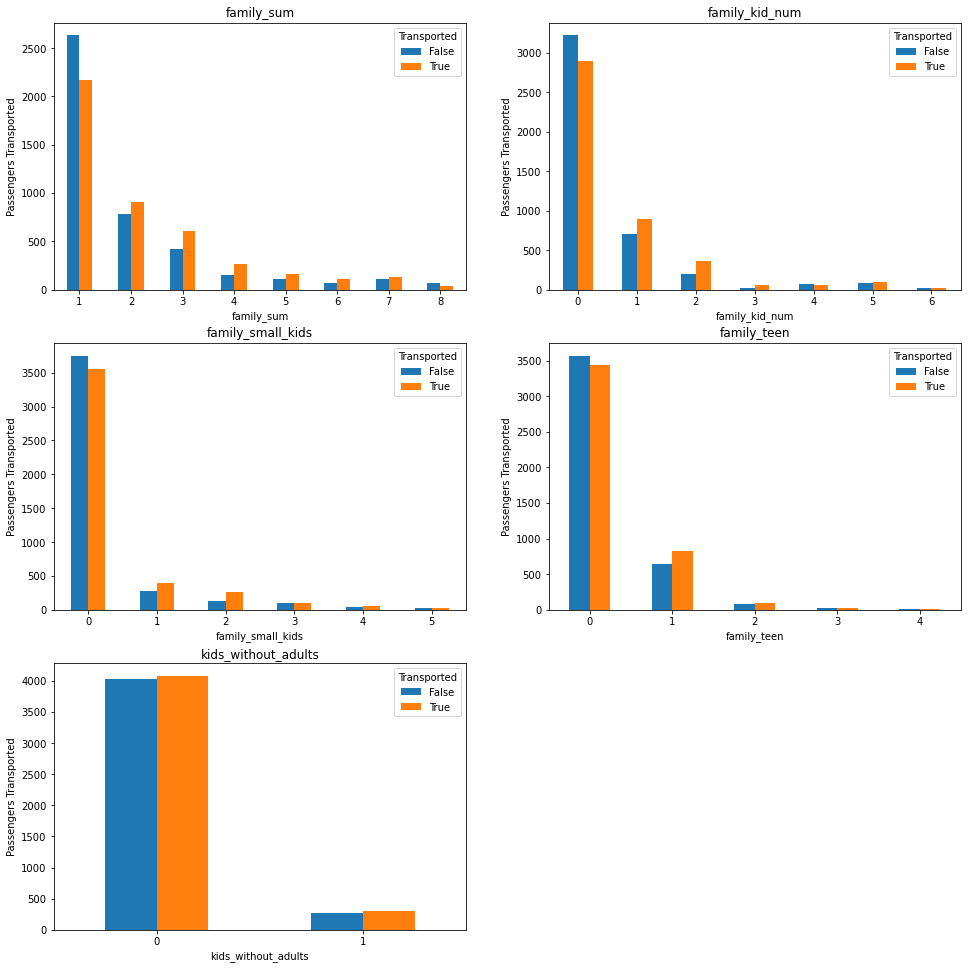

In [36]:
#Plots to compare different families
family_list = ['family_sum', 'family_kid_num', 'family_small_kids', 'family_teen', 'kids_without_adults']

fig = plt.figure(figsize=(18,18))
for i, feat in zip(range(1,6), family_list):
    ax_i = plt.subplot(3, 2, i)
    family_group = df_train.groupby([feat,'Transported']).size().unstack('Transported')
    family_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Passengers Transported')
    ax_i.set_title(feat)

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.8, 
                    top=1.2, 
                    wspace=0.2, 
                    hspace=0.2)

plt.show()

In [37]:
#Looking at data of just those in CryoSleep
cryo_df = df_train[df_train['CryoSleep'] == True]

#See if a group with at leat one member not Cryo Sleep is more likly to be transported

df_cryo_fam = df_train.groupby(['CryoSleep','Cryo_Fam','Transported']).agg(
    Fam_Count = ('ID_Group','count'))
print(df_cryo_fam)

#Improvement would be to plot the data: Cryo_Fam, Fam_Count vs Transported

                                Fam_Count
CryoSleep Cryo_Fam Transported           
False     0        False             3734
                   True              1824
True      0        False              199
                   True              1015
          1        False              355
                   True              1468


With more time I would plot the pivot table above. Looking at the data the cryo groups with one family member awake had a 83.61% chance of being transported and groups in full cryo sleep had a 80.53 % chance of being transported. The Cryo_Fam feature does not appear to have a significant impact on Transported.

In [38]:
#See list of columns again
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Spend_Sum', 'Cryo_Fam', 'Age_Categories',
       'family_sum', 'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults'],
      dtype='object')

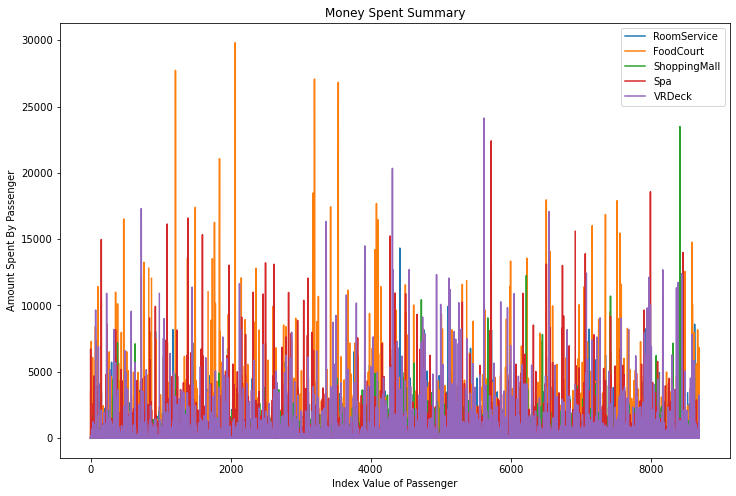

In [39]:
#Plotting raw spending columns
#Removing all rows passengers are in Cryo Sleep
df_awake = df_train[df_train['CryoSleep']==False]
spend_locations = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(12,8))
for location in spend_locations:
    plt.plot(list(df_awake.index.values),
             df_awake[location],
             label=location)
plt.legend()
plt.title('Money Spent Summary')
plt.xlabel('Index Value of Passenger')
plt.ylabel('Amount Spent By Passenger')
plt.show()

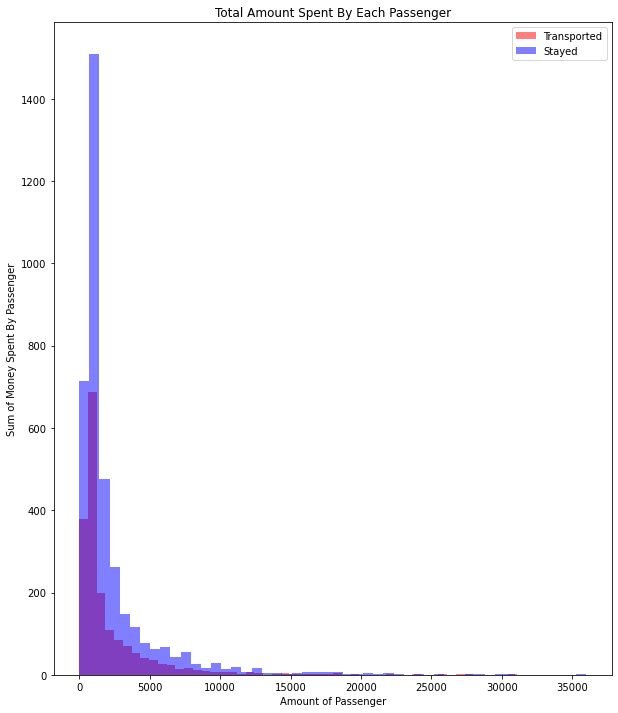

In [40]:
#histogram of money spent by each passenger awake
plt.figure(figsize=(10,12))
transported = df_awake[df_awake["Transported"] == True]
stayed = df_awake[df_awake["Transported"] == False]
transported['Spend_Sum'].plot.hist(alpha=0.5,color='red',bins=50)
stayed['Spend_Sum'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Transported','Stayed'])
plt.title('Total Amount Spent By Each Passenger')
plt.xlabel('Amount of Passenger')
plt.ylabel('Sum of Money Spent By Passenger')
plt.show()

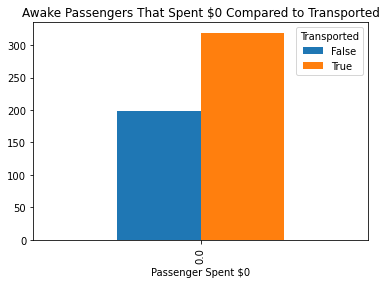

In [41]:
#If they spent money at all vs transported
df_no_spend = df_train[df_train['Spend_Sum']==0]

#Seeing how many spent $0 that were not Cryo Sleep
df_awake = df_no_spend[df_no_spend['CryoSleep']==False]
awake_sum = df_awake.groupby(['Spend_Sum','Transported']).size().unstack('Transported')
awake_sum.plot(kind='bar')
plt.title('Awake Passengers That Spent $0 Compared to Transported')
plt.xlabel('Passenger Spent $0')
plt.show()

In [42]:
#list of all location money is spent on the spaceship by awake passengers
spend_all = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Spend_Sum']

#Description of how much money was spent at each location
for location in spend_all:
    #print((df_train[location]!=0).describe())
    print((df_train[location][df_train[location]!=0]).describe(include='all'))
    print('\n')

count     2935.000000
mean       651.632368
std       1005.556487
min          1.000000
25%         37.000000
50%        320.000000
75%        848.000000
max      14327.000000
Name: RoomService, dtype: float64


count     3054.000000
mean      1276.436477
std       2488.548489
min          1.000000
25%         39.000000
50%        396.500000
75%       1255.750000
max      29813.000000
Name: FoodCourt, dtype: float64


count     2898.000000
mean       508.658385
std        948.906017
min          1.000000
25%         22.000000
50%        195.000000
75%        693.000000
max      23492.000000
Name: ShoppingMall, dtype: float64


count     3186.000000
mean       831.070621
std       1737.733738
min          1.000000
25%         27.000000
50%        226.500000
75%        769.000000
max      22408.000000
Name: Spa, dtype: float64


count     3010.000000
mean       861.392027
std       1797.300831
min          1.000000
25%         28.000000
50%        260.000000
75%        806.500000
max    

In [43]:
#Looking for patterns in each location
#(df_train[['RoomService','Transported']][df_train['RoomService']>2000]).head(10)
#(df_train[['VRDeck','Transported']][df_train['VRDeck']>1000]).head(10)
#(df_train[['Spa','Transported']][df_train['Spa']>1000]).head(10)
#(df_train[['ShoppingMall','Transported']][df_train['ShoppingMall']>700]).head(10)
(df_train[['Spend_Sum','Transported']][df_train['Spend_Sum']>5000]).head(15)

,Spend_Sum,Transported
2,10383.0,False
3,5176.0,False
11,8157.0,True
30,7861.0,False
70,8904.0,True
73,15815.0,False
75,7406.0,False
103,5109.0,False
105,15940.0,True
113,9307.0,False


In [44]:
# Putting money spent in location in to bins
spend_locations = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
spend_cut_points = [-1, -0.1, 0.1, 2000, 30000]
spend_label_names = ['Missing', '$0', '$0.1_2000', '$2001_30000']

#list of spending locations -> spend_locations
for location in spend_locations:
    df_train = process_bins(df_train, location, spend_cut_points, spend_label_names)
    df_test = process_bins(df_test, location, spend_cut_points, spend_label_names)

In [45]:
# sum_cut_points = [-1, -0.1, 0.1, 500, 1000, 2000, 4000, 5000, 30000]
# sum_label_names = ['Missing', '$0', '$0.1_500', '$501_1000','$1001_2000','$2001_3000','$3001_5000', '$5001_30000']
sum_cut_points = [-1, -0.1, 0.1, 500, 1000, 1500, 2500, 4000, 36000]
sum_label_names = ['Missing', '$0', '$0.1_500', '$501_1000','$1001_1500','$1501_2500',
                   '$2501_4000', '$4001_36000']
df_train = process_bins(df_train, 'Spend_Sum', sum_cut_points, sum_label_names)
df_test = process_bins(df_test, 'Spend_Sum', sum_cut_points, sum_label_names)

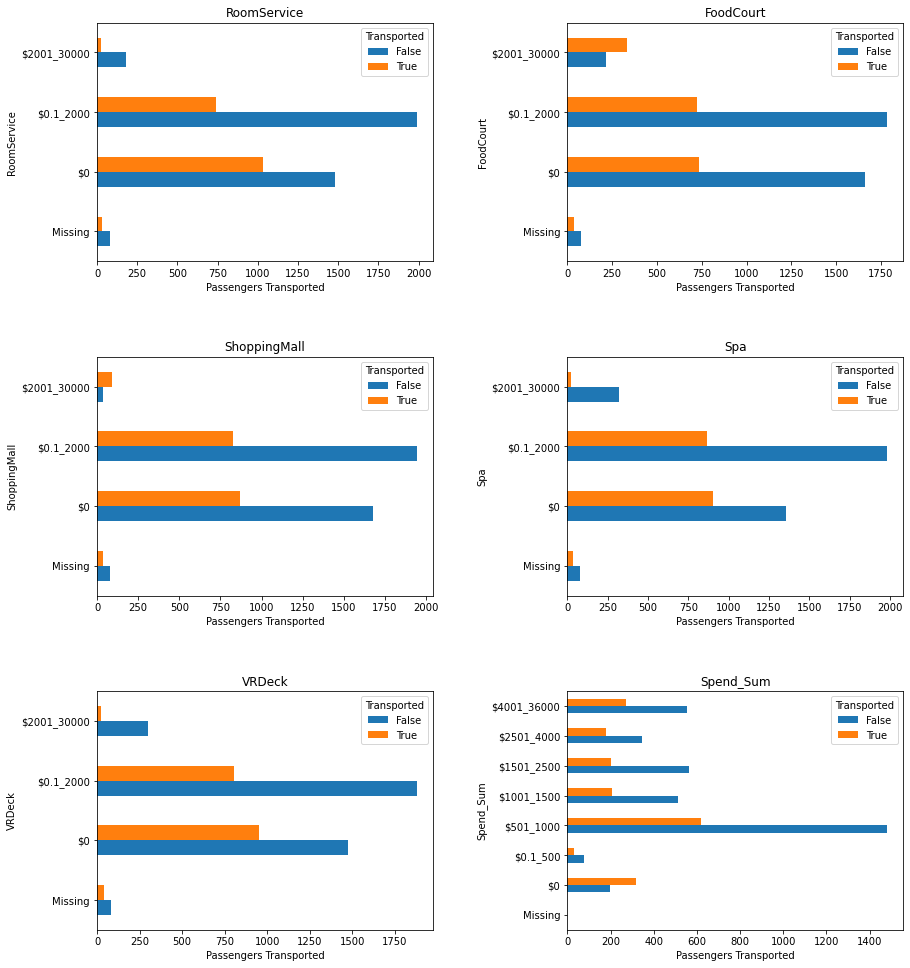

In [46]:
#Plotting the money spent at each location
df_awake = df_train[df_train['CryoSleep']==False]

fig = plt.figure(figsize=(14,18))
for i, location in zip(range(1,7), spend_all):
    ax_i = plt.subplot(3, 2, i)
    #spend_pivot = df_train.pivot_table(index=location+'_Categories', values='Transported', aggfunc=np.sum)
    spend_pivot = pd.pivot_table(df_awake,index = location+'_Categories', columns = 'Transported',aggfunc ='size')
    spend_pivot.plot(kind='barh', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_ylabel(location)
    ax_i.set_xlabel('Passengers Transported')
    ax_i.set_title(location)

# plt.subplot(3,2,6)
# for location in spend_locations:
#     plt.plot(list(df_train.index.values),
#              df_train[location],
#              label=location)
# plt.legend()
# plt.title('Summary of All Money Spent')
# plt.xlabel('Index Value of Passenger')
# plt.ylabel('Amount Spent By Passenger')

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [47]:
#Since $0 leads for all spending locations
#compare $0 to money spent
#list of spending -> spend_all

for location in spend_all:
    df_train[location+'_0'] = df_train.apply(lambda x: 'True' if x[location] == 0 
                                              else ('False' if x[location] > 0 else 'Missing'), axis=1)
    df_test[location+'_0'] = df_test.apply(lambda x: 'True' if x[location] == 0 
                                              else ('False' if x[location] > 0 else 'Missing'), axis=1)

df_train['RoomService_0'].value_counts()

True       5645
False      2935
Missing     113
Name: RoomService_0, dtype: int64

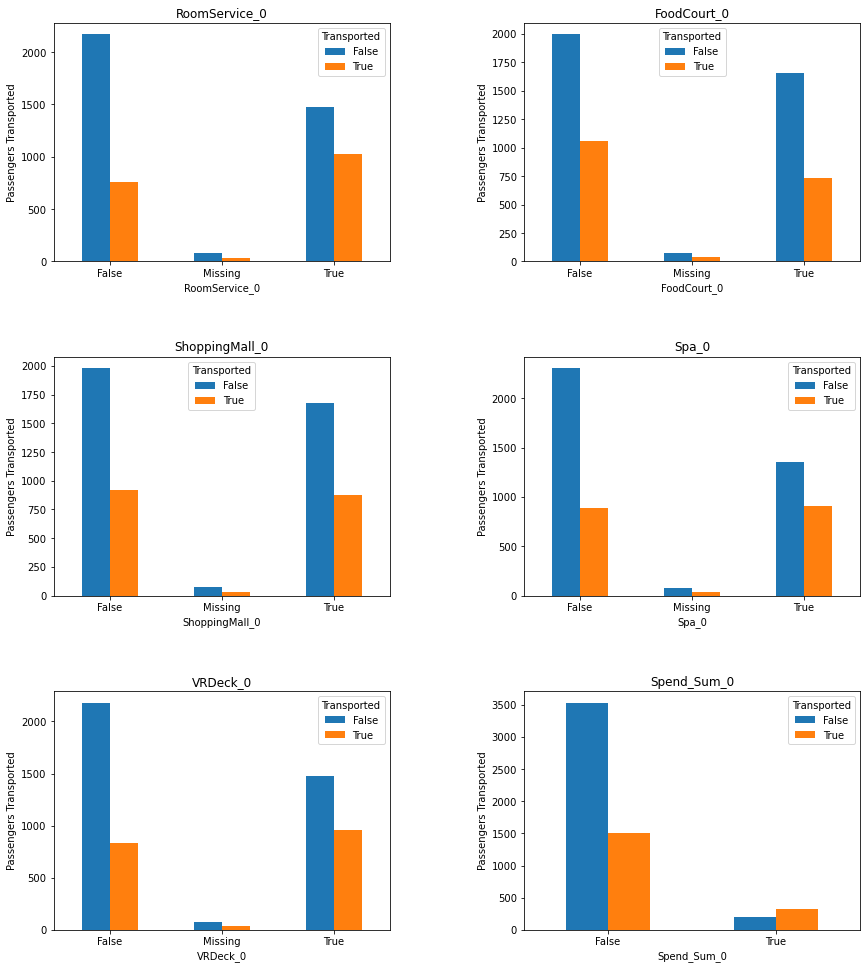

In [48]:
#Plot $0 to if they spent any amount of money at the location
features_0 = ['RoomService_0', 'FoodCourt_0', 'ShoppingMall_0', 'Spa_0', 'VRDeck_0', 'Spend_Sum_0']
df_awake = df_train[df_train['CryoSleep']==False]

fig = plt.figure(figsize=(14,18))
for i, feat in zip(range(1,7), features_0):
    ax_i = plt.subplot(3, 2, i)
    money_group = df_awake.groupby([feat,'Transported']).size().unstack('Transported')
    money_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Passengers Transported')
    ax_i.set_title(feat)

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

There is high correlation between a passenger in Cryo Sleep and a passenger that spend 0. This is becuase if a passenger is in cryo sleep they spend no money. The plots above help demonstrate the feature Cryo_Sleep is more primary and plays a larger role in passengers being transported then the passengers spending 0.

In [49]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Spend_Sum', 'Cryo_Fam', 'Age_Categories',
       'family_sum', 'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories', 'RoomService_0', 'FoodCourt_0',
       'ShoppingMall_0', 'Spa_0', 'VRDeck_0', 'Spend_Sum_0'],
      dtype='object')

In [50]:
#Removing the $0 spending from each location because it is in each bin
col_remove = ['RoomService_0', 'FoodCourt_0','ShoppingMall_0', 'Spa_0', 'VRDeck_0', 'Spend_Sum_0']
df_train = df_train.drop(col_remove, axis=1)
df_test = df_test.drop(col_remove, axis=1)

In [51]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Spend_Sum', 'Cryo_Fam', 'Age_Categories',
       'family_sum', 'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories'],
      dtype='object')

In [52]:
#convert Cabin column in to two categorical columns:
#Deck and Side (P for port or S for Starboard)
df_train.Cabin.head(10)

df_train['Cabin_Deck'] = df_train.Cabin.str.split('/').str.get(0)
df_train['Cabin_Side'] = df_train.Cabin.str.split('/').str.get(-1)
df_test['Cabin_Deck'] = df_test.Cabin.str.split('/').str.get(0)
df_test['Cabin_Side'] = df_test.Cabin.str.split('/').str.get(-1)

df_train[['Cabin_Deck','Cabin_Side']].head()

,Cabin_Deck,Cabin_Side
0,B,P
1,F,S
2,A,S
3,A,S
4,F,S


In [53]:
#Missing data
df_train.isnull().sum()

PassengerId                  0
HomePlanet                 111
CryoSleep                   98
Cabin                       99
Destination                103
Age                          0
VIP                        116
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
ID_Group                     0
Spend_Sum                    0
Cryo_Fam                     0
Age_Categories               0
family_sum                   0
family_kid_num               0
family_small_kids            0
family_teen                  0
kids_without_adults          0
RoomService_Categories       0
FoodCourt_Categories         0
ShoppingMall_Categories      0
Spa_Categories               0
VRDeck_Categories            0
Spend_Sum_Categories         0
Cabin_Deck                  99
Cabin_Side                  99
dtype: int64

In [54]:
#Looking at how many rows have multiple missing data columns
print(df_train.isnull().sum(axis=1).value_counts())
print('Total Number of rows with missing data: ' + str(df_train[df_train.isnull().sum(axis=1)>0].isnull().value_counts().sum()))

0    8187
1     397
3      90
4      10
2       9
dtype: int64
Total Number of rows with missing data: 506


In [55]:
#The remaining columns are categorical
#Fill all N/A data with 'Missing'
df_train.fillna('Missing', inplace=True)
df_test.fillna('Missing', inplace=True)
#df_train.head(10)
df_train.isnull().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Transported                0
ID_Group                   0
Spend_Sum                  0
Cryo_Fam                   0
Age_Categories             0
family_sum                 0
family_kid_num             0
family_small_kids          0
family_teen                0
kids_without_adults        0
RoomService_Categories     0
FoodCourt_Categories       0
ShoppingMall_Categories    0
Spa_Categories             0
VRDeck_Categories          0
Spend_Sum_Categories       0
Cabin_Deck                 0
Cabin_Side                 0
dtype: int64

In [56]:
#Verifing no null values are in the test data
df_test.isnull().sum()

PassengerId                0
HomePlanet                 0
CryoSleep                  0
Cabin                      0
Destination                0
Age                        0
VIP                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
ID_Group                   0
Spend_Sum                  0
Cryo_Fam                   0
Age_Categories             0
family_sum                 0
family_kid_num             0
family_small_kids          0
family_teen                0
kids_without_adults        0
RoomService_Categories     0
FoodCourt_Categories       0
ShoppingMall_Categories    0
Spa_Categories             0
VRDeck_Categories          0
Spend_Sum_Categories       0
Cabin_Deck                 0
Cabin_Side                 0
dtype: int64

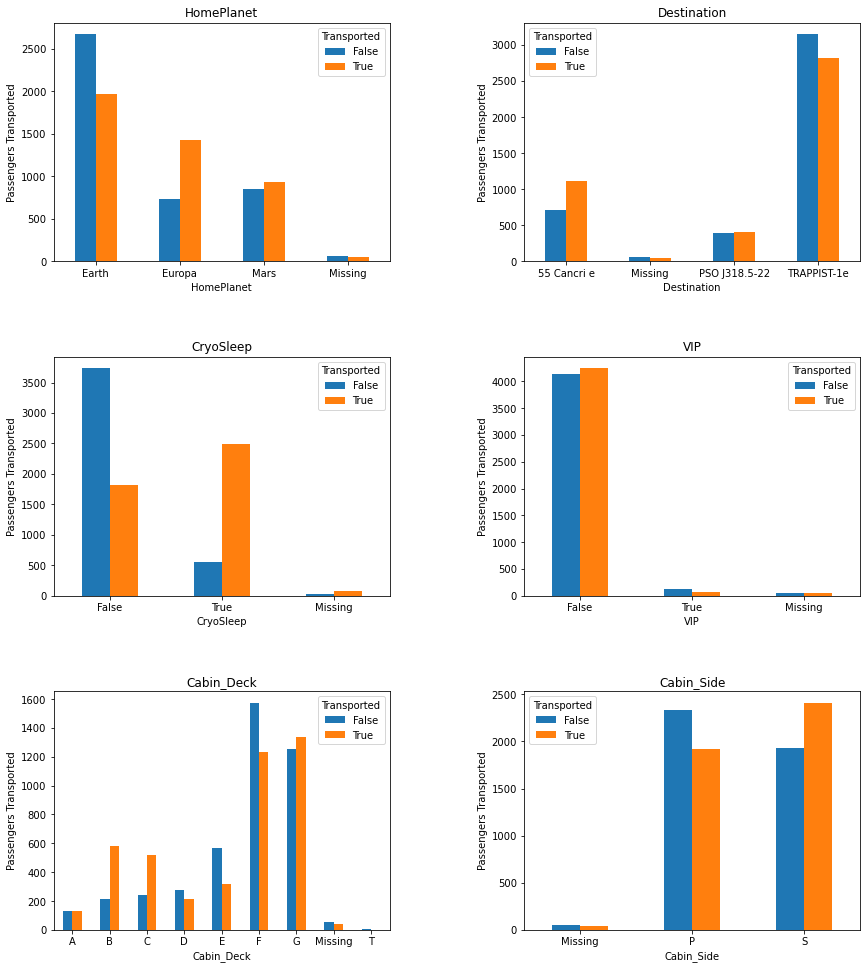

In [57]:
#Plot Remaining Categorical Data Columns
features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Cabin_Deck', 'Cabin_Side']

#df_train.groupby('HomePlanet',as_index=False).agg({'HomePlanet': lambda x : ','.join(x.unique()), 'Transported':'sum'})
#df_train.groupby(['HomePlanet','Transported']).size().unstack('Transported').plot.bar()

fig = plt.figure(figsize=(14,18))
for i, feat in zip(range(1,7), features):
    ax_i = plt.subplot(3, 2, i)
    cat_group = df_train.groupby([feat,'Transported']).size().unstack('Transported')
    cat_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Passengers Transported')
    ax_i.set_title(feat)

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

Based off the plots the features with the largest impact to transported is Homeplanet - Earth, Europa, Destination - 55 Cancri e and TRAPPIST-1e', Cryo Sleep, Cabin Deck - B, C, E, F andd Cabin_Side - S.

In [58]:
#Verifing train and test data are being cleaned and processed the same
print(df_train.shape)
print(df_test.shape)
print(df_train.columns)
print(df_test.columns)

(8693, 30)
(4277, 29)
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Spend_Sum', 'Cryo_Fam', 'Age_Categories',
       'family_sum', 'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories', 'Cabin_Deck', 'Cabin_Side'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'ID_Group', 'Spend_Sum', 'Cryo_Fam', 'Age_Categories', 'family_sum',
       'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Cate

In [59]:
#Calculate percentage of True/False/Missing from each categorical column
bool_features = ['CryoSleep','VIP']
for feature in bool_features:
    bool_percent = df_train[feature].value_counts() / len(df_train)
    print('Percentage of Values for '+feature+' :')
    print(bool_percent)
    print('\n')


Percentage of Values for CryoSleep :
False      0.639365
True       0.349362
Missing    0.011273
Name: CryoSleep, dtype: float64


Percentage of Values for VIP :
False      0.963764
True       0.022892
Missing    0.013344
Name: VIP, dtype: float64




In [60]:
#Converting Boolean data to Numerical True = 1, False = 0 and Missing = -1
#list of object boolean features -> bool_features
for feature in bool_features:
    #train df
    df_train[feature] = df_train[feature].replace({'False': 0, 'True': 1, 'Missing':-1})
    df_train[feature] = df_train[feature].replace({False: 0, True: 1, 'Missing':-1})
    #test df
    df_test[feature] = df_test[feature].replace({'False': 0, 'True': 1, 'Missing':-1})
    df_test[feature] = df_test[feature].replace({False: 0, True: 1, 'Missing':-1})
    
#Converting Transported to 1/0 values
df_train.Transported = df_train.Transported.replace({True: 1, False: 0})

df_train[['CryoSleep','VIP','Transported']].describe(include='all')

,CryoSleep,VIP,Transported
count,8693.000000,8693.000000,8693.000000
mean,0.338088,0.009548,0.503624
std,0.496346,0.190129,0.500016
min,-1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [61]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Spend_Sum', 'Cryo_Fam', 'Age_Categories',
       'family_sum', 'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories', 'Cabin_Deck', 'Cabin_Side'],
      dtype='object')

In [62]:
#Dummy values for all categorical data
cat_features = ['HomePlanet', 'Destination', 
                 'Age_Categories', 'RoomService_Categories',
                 'FoodCourt_Categories','ShoppingMall_Categories',
                 'Spa_Categories','Spend_Sum_Categories',
                'VRDeck_Categories','Cabin_Deck','Cabin_Side']

dummy_train_df = pd.get_dummies(df_train[cat_features])
df_train = pd.concat([df_train, dummy_train_df], axis=1)

dummy_test_df = pd.get_dummies(df_test[cat_features])
df_test = pd.concat([df_test, dummy_test_df], axis=1)

df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_Missing,Cabin_Deck_T,Cabin_Side_Missing,Cabin_Side_P,Cabin_Side_S
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,0,0,0,1,0,0,0,0,0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,0,0,0,0,0,0,0,0,0,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,0,0,0,1,0,0,0,0,0,1
5,0005_01,Earth,0,F/0/P,PSO J318.5-22,44.0,0,0.0,483.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,0006_01,Earth,0,F/2/S,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,...,0,0,0,1,0,0,0,0,0,1
7,0006_02,Earth,1,G/0/S,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
8,0007_01,Earth,0,F/3/S,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,...,0,0,0,1,0,0,0,0,0,1
9,0008_01,Europa,1,B/1/P,55 Cancri e,14.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Spend_Sum', 'Cryo_Fam', 'Age_Categories',
       'family_sum', 'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'Spend_Sum_Categories', 'Cabin_Deck', 'Cabin_Side', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_Missing',
       'Destination_55 Cancri e', 'Destination_Missing',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'Age_Categories_Missing', 'Age_Categories_Infant',
       'Age_Categories_Child', 'Age_Categories_Teenager',
       'Age_Categories_Young Adult', 'Age_Categories_Adult',
       'Age_Categories_Senior', 'RoomService_Categories_Missing',
       'RoomService_Categorie

In [64]:
#Clean the names of some of the columns

df_train.columns = df_train.columns.str.replace('_Categories_', '_')
df_test.columns = df_test.columns.str.replace('_Categories_', '_')

In [65]:
#Drop original Category columns:
cat_col = ['Age_Categories', 'RoomService_Categories',
                 'FoodCourt_Categories','ShoppingMall_Categories',
                 'Spa_Categories','Spend_Sum_Categories',
                'VRDeck_Categories','Cabin_Deck','Cabin_Side']
df_train = df_train.drop(cat_col, axis=1)
df_test = df_test.drop(cat_col, axis=1)

In [66]:
#Double checking my test data frame is the same number of columns 
#(minuse Transported) as the train data frame
print(df_train.shape)
print(df_test.shape)
df_train.columns

(8693, 76)
(4277, 75)


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'ID_Group', 'Spend_Sum', 'Cryo_Fam', 'family_sum',
       'family_kid_num', 'family_small_kids', 'family_teen',
       'kids_without_adults', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'HomePlanet_Missing', 'Destination_55 Cancri e',
       'Destination_Missing', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Age_Missing', 'Age_Infant', 'Age_Child',
       'Age_Teenager', 'Age_Young Adult', 'Age_Adult', 'Age_Senior',
       'RoomService_Missing', 'RoomService_$0', 'RoomService_$0.1_2000',
       'RoomService_$2001_30000', 'FoodCourt_Missing', 'FoodCourt_$0',
       'FoodCourt_$0.1_2000', 'FoodCourt_$2001_30000', 'ShoppingMall_Missing',
       'ShoppingMall_$0', 'ShoppingMall_$0.1_2000', 'ShoppingMall_$2001_30000',
       'Spa_Missing', 'Spa_$0', 'Spa_$0.1_2000', 'Spa_$200

In [67]:
#Exporting Full Data Frame
#Next File will be performing the Machine Learning
#Duplicate columns and weak features will be removed in the Machine Learning File

#df_train.to_csv(data_file_path+'Initial_Analysis_Train_SpaceTitanic.csv',index=False)
#df_test.to_csv(data_file_path+'Initial_Analysis_Test_SpaceTitanic.csv', index=False)